In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

## Basic

### Part 1: Markov Chains

1. Find the state of land use in 2009 and 2014, assuming that the transition probabilities for 5-year intervals are given by the matrix A and remain practically the same over the time considered.

In [2]:
A = np.array([[.7, .1, 0], 
              [.2, .9, .2], 
              [.1, 0, .8]])

land_2004 = np.array([.25, .20, .55])

In [3]:
land_2009 = A.dot(land_2004)

land_2009

array([0.195, 0.34 , 0.465])

In [4]:
land_2014 = A.dot(land_2009)

land_2014

array([0.1705, 0.438 , 0.3915])

2. Suppose that all of the land in the city starts as residential. Use the transition matrix to calculate how the usage of the other three land types evolves over time.

In [5]:
all_res = np.array([0,0,1])

all_res_2009 = A.dot(all_res)

all_res_2009

array([0. , 0.2, 0.8])

In [6]:
all_res_2014 = A.dot(all_res_2009)

all_res_2014

array([0.02, 0.34, 0.64])

3. Do the same as above for both an all industrial and an all commercial starting point. How does the long term makeup of the city differ for different starting points?

In [7]:
all_ind = np.array([0,1,0])
all_ind_2009 = A.dot(all_ind)
all_ind_2014 = A.dot(all_ind_2009)

all_ind_2014

array([0.16, 0.83, 0.01])

In [8]:
all_comm = np.array([1,0,0])
all_comm_2009 = A.dot(all_comm)
all_comm_2014 = A.dot(all_comm_2009)

all_comm_2014

array([0.51, 0.34, 0.15])

### Plotting to visualize land use change over time for different initial states

In [9]:
def change_over_time(initial, A, num_cycles):
    output = np.zeros((initial.shape[0], num_cycles + 1))
    output[:,0] = initial
    for i in range(1, num_cycles + 1):
        output[:,i] = A.dot(output[:,i-1])
    return output


def plot_over_time(initial, A, num_cycles, ax, title):
    output = change_over_time(initial, A, num_cycles)
    x = np.arange(num_cycles + 1)
    ax.plot(x, output[0,:], label='Commercial')
    ax.plot(x, output[1,:], label='Industrial')
    ax.plot(x, output[2,:], label='Residential')
    ax.set_xlabel('# of 5 year cycles')
    ax.set_ylabel('% Land Use')
    ax.set_title(title)
    ax.legend()

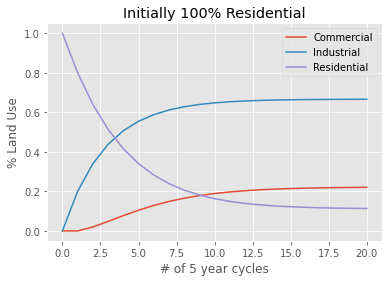

In [10]:
fig, ax = plt.subplots()
num_cycles = 20
plot_over_time(all_res, A, num_cycles, ax, title="Initially 100% Residential")

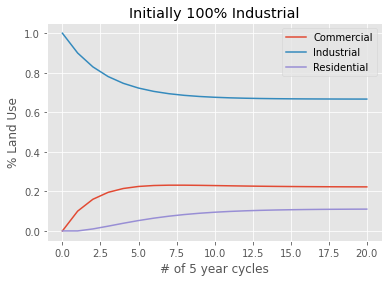

In [11]:
fig, ax = plt.subplots()
num_cycles = 20
plot_over_time(all_ind, A, num_cycles, ax, title="Initially 100% Industrial")

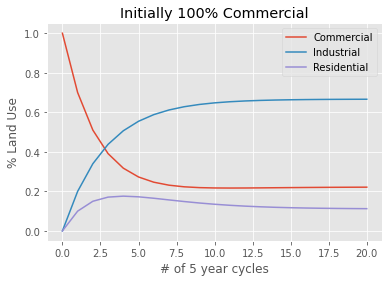

In [12]:
fig, ax = plt.subplots()
num_cycles = 20
plot_over_time(all_comm, A, num_cycles, ax, title="Initially 100% Commercial")

## Advanced

### Part 2: Iris

In [13]:
iris = pd.read_csv('data/iris.txt')
data = iris[['SepalWidth', 'SepalLength']].values

Text(0, 0.5, 'Sepal Length')

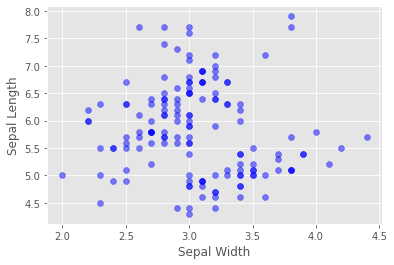

In [14]:
widths = data[:,0]
lengths = data[:,1]

fig, ax = plt.subplots()
ax.scatter(widths, lengths, color='b', alpha=0.5)
ax.set_xlabel("Sepal Width")
ax.set_ylabel("Sepal Length")

2. Compute the mean vector (column-wise) of the data matrix. The shape of the mean vector should be (1, 2). Plot the mean sepal width and sepal length vector on the scatter plot in question 1

In [15]:
mean_vector = np.mean(data, axis=0)
mean_vector

array([3.054     , 5.84333333])

Text(0, 0.5, 'Sepal Length')

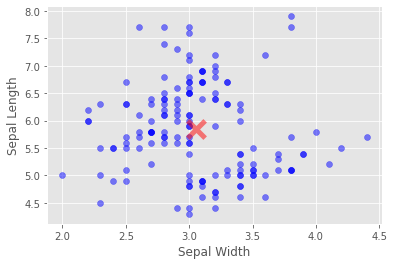

In [16]:
widths = data[:,0]
lengths = data[:,1]

fig, ax = plt.subplots()
ax.scatter(widths, lengths, color='b', alpha=0.5)
ax.scatter(mean_vector[0], mean_vector[1], marker='x', s=300, c='r', alpha=0.5, linewidths=5)
ax.set_xlabel("Sepal Width")
ax.set_ylabel("Sepal Length")

3. Write a function (euclidean_dist) to calculate the euclidean distance between two column vectors (not row vector). Your function should check if the vectors are column vectors and the shape of the two vectors are the same.

In [17]:
def is_column_vector(v):
    return len(v.shape) == 2 and v.shape[1] == 1

def check_shape(v1, v2):
    return v1.shape == v2.shape

def check_args(v1, v2):
    if not check_shape(v1, v2):
        raise ValueError("Vectors are not the same size")
    if not is_column_vector(v1):
        raise ValueError("Not a column vector")

def euclidean_dist(v1, v2):
    check_args(v1, v2)
    return np.sqrt(np.sum((v1-v2)**2))

In [18]:
def cosine_sim(v1, v2):
    numerator = v1.T.dot(v2)
    denominator = np.linalg.norm(v1) * np.linalg.norm(v2)
    return numerator/denominator

In [19]:
a = np.array([5,4,3,2]).reshape(-1,1)
b = np.array([7,6,5,4]).reshape(-1,1)

In [20]:
a.T.dot(b).flatten()

array([82])

In [21]:
cosine_sim(a,b)

array([[0.99410372]])

5. Write a function that would loop through all the data points in a given matrix and calculate the given distance metric between each of the data points and the mean vector.

Input of the function:

    Data matrix as an ndarray
    Function to compute distance metric (Euclidean / Cosine Similarity)

Output of the function:

    An array of distances.

In [22]:
def compute_dist(data, metric):
    
    mean_vector = np.mean(data, axis=0).reshape(-1,1)
    
    distances = np.array([])
    
    for row in data:
        col = row.reshape(-1,1)
        dist = metric(col, mean_vector)
        distances = np.append(distances, dist)
    
    return np.array(distances)
        

In [23]:
euc_dist_lst = compute_dist(data, euclidean_dist)
euc_dist_lst

array([0.07827587, 1.05766745, 0.77217902, 1.2518761 , 0.86825137,
       1.1526175 , 0.65888323, 0.35664237, 0.8579008 , 1.02019301,
       0.98481493, 1.05311939, 0.15316803, 0.26228568, 0.94445422,
       0.91155203, 0.91155203, 0.29165124, 0.87848   , 1.36450007,
       0.07827587, 0.65888323, 1.35361015, 0.65176206, 1.0939807 ,
       0.95400582, 0.82848885, 1.24418398, 1.35774093, 0.96774331,
       0.95512326, 0.85587798, 0.5722416 , 0.45606335, 0.9270709 ,
       0.60508438, 0.35664237, 1.05311939, 0.88151032, 0.71795574,
       0.24925311, 0.26228568, 0.9581895 , 1.46478455, 0.42956619,
       1.04472984, 1.25782634, 0.47608869, 0.84411321, 0.75964495,
       0.21038166, 0.35174865, 1.44434314, 0.51871037, 0.56237038,
       0.57294018, 1.05766745, 1.85745178, 0.36110079, 0.28797068,
       0.52153023, 0.65969218, 0.95400582, 0.78298177, 0.24925311,
       0.44660995, 0.2576699 , 0.94445422, 1.35793732, 0.73047504,
       2.18778285, 1.91136786, 0.36110079, 0.56284436, 1.29057

In [24]:
cos_sim_lst = compute_dist(data, cosine_sim)
cos_sim_lst

array([0.99993732, 0.99823934, 0.99771589, 0.99204716, 0.99154169,
       0.99326126, 0.99879028, 0.99894597, 0.99883635, 0.99226404,
       0.98935672, 0.98742472, 0.99999586, 0.99969911, 0.99660019,
       0.99332851, 0.99332851, 0.99968764, 0.99482565, 0.9979924 ,
       0.99993732, 0.99879028, 0.98458894, 0.99848936, 0.99995175,
       0.99167489, 0.99634547, 0.99380121, 0.99623443, 0.99912826,
       0.98966647, 0.99615571, 0.9976705 , 0.99818965, 0.99966651,
       0.99809589, 0.99894597, 0.98742472, 0.99135903, 0.9946141 ,
       0.99994789, 0.99969911, 0.99781563, 0.99465297, 0.99947709,
       0.99703706, 0.99665466, 0.99856107, 0.9918373 , 0.99434464,
       0.99993994, 0.99983885, 0.99318449, 0.99999958, 0.996776  ,
       0.99991173, 0.99823934, 0.99394702, 0.99868578, 0.9999929 ,
       0.99690562, 0.9966087 , 0.99167489, 0.99570603, 0.99994789,
       0.99967494, 0.99949312, 0.99660019, 0.98340291, 0.9952532 ,
       0.99944701, 0.98786303, 0.99868578, 0.99637874, 0.98802

6. Plot histograms of the euclidean distances and cosine similarities using only sepal width and sepal length. 

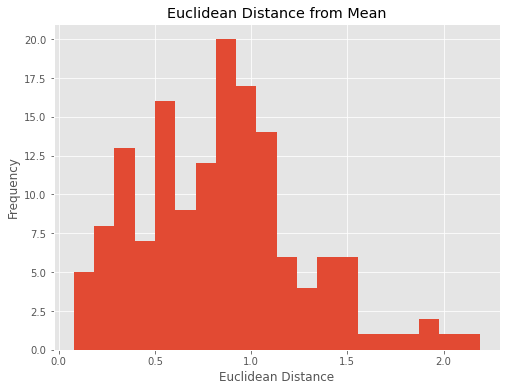

In [25]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(euc_dist_lst, bins=20)
ax.set_xlabel("Euclidean Distance")
ax.set_ylabel("Frequency")
ax.set_title("Euclidean Distance from Mean");

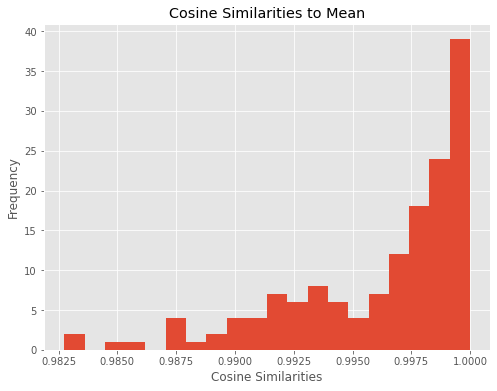

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(cos_sim_lst, bins=20)
ax.set_xlabel("Cosine Similarities")
ax.set_ylabel("Frequency")
ax.set_title("Cosine Similarities to Mean");

## Extra Credit

### Part 3: Implementing the Page Rank Algorithm

1. Create an numpy ndarray representing the transition probabilities between nodes for the above network (in the image). The position i, j in the matrix corresponds to the probability of going from node i to node j.

In [27]:
transition_matrix = np.array([[0,1,0,0,0],
                             [.5,0,.5,0,0],
                             [1/3, 1/3, 0, 0, 1/3],
                             [1,0,0,0,0],
                             [0,1/3,1/3,1/3,0]])
transition_matrix

array([[0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.        , 0.5       , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.        , 0.        , 0.33333333],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.33333333, 0.33333333, 0.        ]])

2. Now that we have a transition matrix, the next step is to iterate on this from one page to the next (like someone blindly navigating the internet) and see where we end up. The probability distribution for our random surfer can be described in this matrix notation as well (or vector rather).

    Initialize a vector for the probability of where our random surfer is. It will be a vector with length equal to the number of pages. Initialize it to be equally probable to start on any page (i.e. you start randomly in a state on the chain).

In [28]:
states = np.full((len(transition_matrix),), 1/len(transition_matrix))
states

array([0.2, 0.2, 0.2, 0.2, 0.2])

3. To take a step on the chain, simply matrix multiply our user vector by the transition matrix. After one iteration, what is the most likely location for your random surfer?

In [29]:
one_iteration = states.dot(transition_matrix)
one_iteration

array([0.36666667, 0.33333333, 0.16666667, 0.06666667, 0.06666667])

4. Plot how the probabilities change. Iterate the matrix through the first ten steps. At each step create a bar plot of the surfers probability vector.

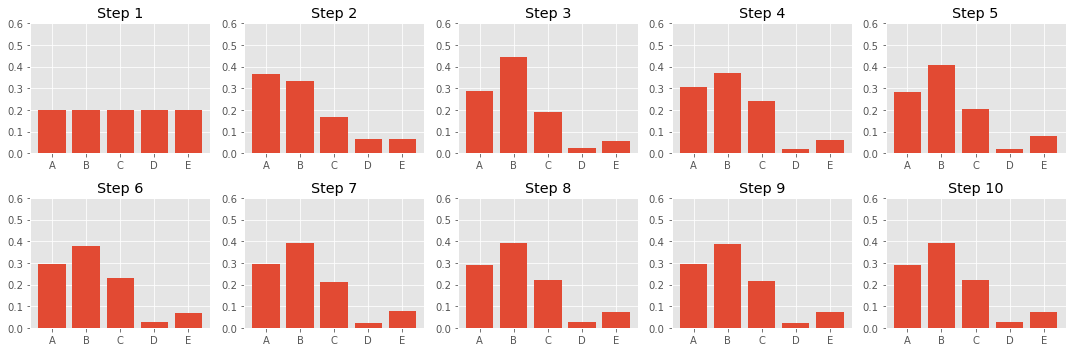

In [30]:
LETTERS = 'ABCDE'

states = np.full((len(transition_matrix),), 1/len(transition_matrix))

fig = plt.figure(1, figsize=(15, 5))
for i in range(1,11):
    ax = plt.subplot(2, 5, i)
    ax.bar(range(5), states)
    ax.set_xticks(np.arange(5))
    ax.set_xticklabels([ch for ch in LETTERS])
    ax.set_ylim(0, .6)
    ax.set_title("Step " + str(i))
    states = states.dot(transition_matrix)
fig.tight_layout()

5. This time to compute the stationary distribution, we can use numpy's matrix operations. Using the function for calculating eigenvectors compute the stationary distribution (page rank). Is it the same as what you found from above? What is it's eigenvalue?

In [31]:
print('Matrix multiplication solution:', states)

Matrix multiplication solution: [0.29401853 0.3881158  0.22055793 0.02429338 0.07301436]


In [32]:
print('Eigenvector solution: ', np.linalg.eig(transition_matrix.T)[1][:, 0] / np.sum(np.linalg.eig(transition_matrix.T)[1][:, 0]))

Eigenvector solution:  [0.29268293-0.j 0.3902439 -0.j 0.2195122 -0.j 0.02439024-0.j
 0.07317073-0.j]
